✅ R²: 0.354
📉 MAE: 0.282
📉 RMSE: 0.393


C:\Users\young\AppData\Local\Temp\ipykernel_48636\4221025580.py:39: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\young\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


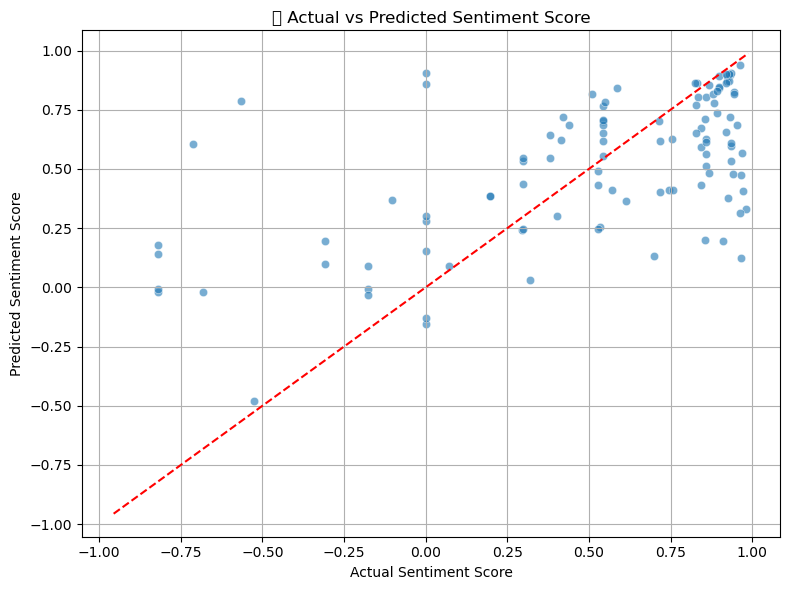

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("05_d_m_additional_analystics.csv")

features = ['Score_with_stats', 'ast_per_game', 'stl_per_game', 'tov_per_game']
target = 'Sentiment Score'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"✅ R²: {r2:.3f}")
print(f"📉 MAE: {mae:.3f}")
print(f"📉 RMSE: {rmse:.3f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Sentiment Score")
plt.ylabel("Predicted Sentiment Score")
plt.title("🎯 Actual vs Predicted Sentiment Score")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 대각선
plt.grid(True)
plt.tight_layout()
plt.show()
